# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# Read Data

In [2]:
# read data
dataFileName = ('../../_data/_processed/' + 'processed_for_viz.csv')
df = pd.read_csv(dataFileName)
print(df.columns)

Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross revenue', 'company', 'runtime',
       'release month', 'release day', 'release year', 'release month num',
       'release date', 'release quarter', 'release day of week', 'title',
       'gross profit', 'profit margin', 'profit multiple'],
      dtype='object')


# Basic Descriptive Statistics

In [3]:
df.describe()

,score,votes,budget,gross revenue,runtime,release day,release year,release month num,release quarter,gross profit,profit margin,profit multiple
count,7169.000000,7.169000e+03,7.169000e+03,7.169000e+03,7169.000000,7169.000000,7169.000000,7169.000000,7169.00000,7.169000e+03,7169.000000,7169.000000
mean,6.376510,9.289715e+04,3.180830e+07,8.151105e+07,107.783233,16.067094,2000.886037,6.587251,2.53271,4.970275e+07,4.317142,5.317142
std,0.962503,1.674199e+05,3.751776e+07,1.683817e+08,18.621221,8.543324,11.050197,3.440617,1.12516,1.426387e+08,160.109145,160.109145
min,1.900000,1.050000e+02,6.000000e+03,3.090000e+02,63.000000,1.000000,1980.000000,1.000000,1.00000,-1.580311e+08,-0.999979,0.000021
25%,5.800000,1.100000e+04,1.000000e+07,5.410972e+06,95.000000,9.000000,1992.000000,4.000000,2.00000,-7.634502e+06,-0.570101,0.429899
50%,6.400000,3.600000e+04,2.000000e+07,2.209985e+07,104.000000,16.000000,2001.000000,7.000000,3.00000,4.095658e+06,0.338705,1.338705
75%,7.000000,9.900000e+04,3.700000e+07,7.981794e+07,117.000000,23.000000,2010.000000,10.000000,4.00000,4.651850e+07,2.077351,3.077351
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,31.000000,2020.000000,12.000000,4.00000,2.610246e+09,12889.386667,12890.386667


# Train a Linear Regression Model

In [4]:
# define model variables
predictors = ['rating', 'genre', 'runtime', 'release quarter'] #'director', 'writter', 'star', 'company' are other options but they lead to
outcome = 'score'
normalize = True # normalize=true does not seem to impact the performance on this dataset
testSize = 0.3

In [5]:
# partition data
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=testSize, random_state=1)

In [6]:
# fitting a regression model
lm = LinearRegression(normalize=normalize) 
lm.fit(train_X, train_y)

# print coefficients
print('Table 6.3')
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures (training data)
regressionSummary(train_y, lm.predict(train_X))

Table 6.3
intercept  3.8080638136742677
           Predictor  coefficient
0            runtime     0.020004
1    release quarter     0.017976
2       rating_NC-17     0.080276
3   rating_Not Rated     0.241123
4          rating_PG    -0.027375
5       rating_PG-13     0.060987
6           rating_R     0.226826
7       rating_TV-MA     0.525613
8     rating_Unrated     0.104041
9           rating_X     0.109716
10   genre_Adventure     0.236504
11   genre_Animation     1.127168
12   genre_Biography     0.651073
13      genre_Comedy     0.176896
14       genre_Crime     0.375508
15       genre_Drama     0.356189
16      genre_Family     0.616568
17     genre_Fantasy     0.116699
18      genre_Horror    -0.192628
19     genre_Mystery     0.405033
20     genre_Romance     0.329679
21      genre_Sci-Fi     0.683245
22    genre_Thriller     0.187120
23     genre_Western    -0.266451

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) 

# Make Predictions on Validation Data

In [7]:
# Use predict() to make predictions on a new set

lm_pred = lm.predict(valid_X)
result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y, 'Residual': valid_y - lm_pred})

print('Table 6.4')
print(result.head(20))


Table 6.4
      Predicted  Actual  Residual
4332   6.319528     7.0  0.680472
1117   6.351244     6.5  0.148756
4492   6.782106     5.7 -1.082106
7107   6.026024     6.3  0.273976
1475   6.408723     6.3 -0.108723
6908   5.893190     6.7  0.806810
462    5.811148     5.8 -0.011148
6392   6.449414     7.1  0.650586
5083   6.322626     5.8 -0.522626
2684   6.440287     6.1 -0.340287
3709   6.246063     7.0  0.753937
1558   6.727772     7.6  0.872228
1651   7.444851     7.5  0.055149
299    5.618986     5.7  0.081014
447    6.035005     4.7 -1.335005
325    5.910058     6.4  0.489942
4286   6.728175     6.2 -0.528175
6842   6.268094     7.0  0.731906
1877   6.418257     5.8 -0.618257
758    6.245324     5.9 -0.345324


# Evaluate the Performance

In [8]:
# print performance measures
regressionSummary(valid_y, lm_pred)


Regression statistics

                      Mean Error (ME) : -0.0270
       Root Mean Squared Error (RMSE) : 0.8213
            Mean Absolute Error (MAE) : 0.6311
          Mean Percentage Error (MPE) : -2.5705
Mean Absolute Percentage Error (MAPE) : 10.9149


0.7777777777777778


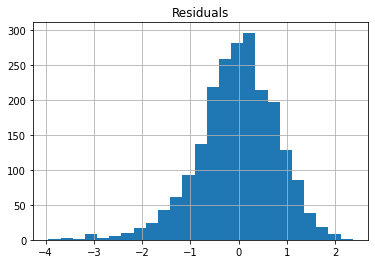

In [9]:
def residual_hist(model, valid_X, valid_y, bins, bounds):
    # plotting histogram of validation errors
    residual_bound = bounds

    predicted = model.predict(valid_X)
    all_residuals = valid_y - predicted

    # Determine the percentage of datapoints with a residual in [-.95, .95] = approx. 75%
    print(len(all_residuals[(all_residuals > -residual_bound) & (all_residuals < residual_bound)]) / len(all_residuals))

    pd.DataFrame({'Residuals': all_residuals}).hist(bins=bins)
    plt.show()

# plotting histogram of validation errors
residual_hist(lm, valid_X, valid_y, 25, .95)

# Variable Selection

In [10]:
# backward elimination (stepwise)

def train_model(variables):
    model = LinearRegression(normalize=normalize) # normalize=true does not seem to impact the performance on this dataset
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model_be, best_variables_be = backward_elimination(allVariables, train_model, score_model, verbose=True)

print('Table 6.6')
print(best_variables_be)

regressionSummary(valid_y, best_model_be.predict(valid_X[best_variables_be]))


Variables: runtime, release quarter, rating_NC-17, rating_Not Rated, rating_PG, rating_PG-13, rating_R, rating_TV-MA, rating_Unrated, rating_X, genre_Adventure, genre_Animation, genre_Biography, genre_Comedy, genre_Crime, genre_Drama, genre_Family, genre_Fantasy, genre_Horror, genre_Mystery, genre_Romance, genre_Sci-Fi, genre_Thriller, genre_Western
Start: score=12557.17
Step: score=12555.20, remove rating_X
Step: score=12553.31, remove rating_PG
Step: score=12551.54, remove rating_NC-17
Step: score=12549.84, remove genre_Western
Step: score=12548.19, remove genre_Thriller
Step: score=12546.69, remove genre_Fantasy
Step: score=12545.30, remove rating_Unrated
Step: score=12544.33, remove genre_Romance
Step: score=12543.90, remove genre_Family
Step: score=12543.55, remove rating_TV-MA
Step: score=12543.55, remove None
Table 6.6
['runtime', 'release quarter', 'rating_Not Rated', 'rating_PG-13', 'rating_R', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Cri

In [11]:
# forward selection
print('Table 6.7')

# the initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression(normalize=normalize) # normalize=true does not seem to impact the performance on this dataset
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model_fs, best_variables_fs = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables_fs)

regressionSummary(valid_y, best_model_fs.predict(valid_X[best_variables_fs]))


Table 6.7
Variables: runtime, release quarter, rating_NC-17, rating_Not Rated, rating_PG, rating_PG-13, rating_R, rating_TV-MA, rating_Unrated, rating_X, genre_Adventure, genre_Animation, genre_Biography, genre_Comedy, genre_Crime, genre_Drama, genre_Family, genre_Fantasy, genre_Horror, genre_Mystery, genre_Romance, genre_Sci-Fi, genre_Thriller, genre_Western
Start: score=13907.10, constant
Step: score=13000.42, add runtime
Step: score=12811.85, add genre_Animation
Step: score=12739.30, add genre_Biography
Step: score=12682.81, add genre_Drama
Step: score=12630.86, add genre_Crime
Step: score=12597.08, add rating_R
Step: score=12574.75, add genre_Comedy
Step: score=12558.91, add genre_Adventure
Step: score=12551.81, add genre_Horror
Step: score=12547.23, add rating_Not Rated
Step: score=12544.42, add rating_PG
Step: score=12543.58, add release quarter
Step: score=12543.02, add genre_Sci-Fi
Step: score=12542.58, add genre_Mystery
Step: score=12542.58, add None
['runtime', 'genre_Animati

In [12]:
# stepwise regression
print('Table 6.8')

best_model_stepwise, best_variables_stepwise = stepwise_selection(train_X.columns, train_model, score_model, verbose=True) 
print(best_variables_stepwise)
regressionSummary(valid_y, best_model_stepwise.predict(valid_X[best_variables_stepwise]))

Table 6.8
Variables: runtime, release quarter, rating_NC-17, rating_Not Rated, rating_PG, rating_PG-13, rating_R, rating_TV-MA, rating_Unrated, rating_X, genre_Adventure, genre_Animation, genre_Biography, genre_Comedy, genre_Crime, genre_Drama, genre_Family, genre_Fantasy, genre_Horror, genre_Mystery, genre_Romance, genre_Sci-Fi, genre_Thriller, genre_Western
Start: score=13907.10, constant
Step: score=13000.42, add runtime
Step: score=12811.85, add genre_Animation
Step: score=12739.30, add genre_Biography
Step: score=12682.81, add genre_Drama
Step: score=12630.86, add genre_Crime
Step: score=12597.08, add rating_R
Step: score=12574.75, add genre_Comedy
Step: score=12558.91, add genre_Adventure
Step: score=12551.81, add genre_Horror
Step: score=12547.23, add rating_Not Rated
Step: score=12544.42, add rating_PG
Step: score=12543.58, add release quarter
Step: score=12543.02, add genre_Sci-Fi
Step: score=12542.58, add genre_Mystery
Step: score=12542.58, unchanged None
['runtime', 'genre_A

# Use the prediction models

In [13]:
# create a movie (in this data a movie can't have more than one rating nor more than one genre)
newMovie = pd.DataFrame([{
    'runtime': 3*60,
    'release quarter': 2, # 1-4
    'rating_G': 0,
    'rating_NC-17': 0,
    'rating_Not Rated': 0,
    'rating_PG': 0,
    'rating_PG-13': 0,
    'rating_R': 1,
    'rating_TV-MA': 0,
    'rating_Unrated': 0,
    'rating_X': 0,
    'rating_TV-14': 0, 
    'rating_TV-PG': 0, 
    'genre_Adventure': 0,
    'genre_Animation': 0,
    'genre_Biography': 0,
    'genre_Comedy': 0,
    'genre_Crime': 0,
    'genre_Drama': 0,
    'genre_Family': 0,
    'genre_Fantasy': 0,
    'genre_Horror': 1,
    'genre_Mystery': 0,
    'genre_Romance': 0,
    'genre_Sci-Fi': 0,
    'genre_Thriller': 0,
    'genre_Western': 0,
    'genre_Music': 0,
    'genre_Musical': 0,
    'genre_Sport':0
}])

newMovie_thin = newMovie.loc[:, ~(newMovie == 0).any()]

# predict it's score
print(f'What score do we expect from a new movie with the following features?\n{newMovie_thin.T}\n')
print(f'{outcome} per original model (all predictors): {lm.predict(newMovie[X.columns])}')
print(f'{outcome} per backward elimination: {best_model_be.predict(newMovie[best_variables_be])}')
print(f'{outcome} per forward selection: {best_model_fs.predict(newMovie[best_variables_fs])}')
print(f'{outcome} per stepwise: {best_model_stepwise.predict(newMovie[best_variables_stepwise])}')

What score do we expect from a new movie with the following features?
                   0
runtime          180
release quarter    2
rating_R           1
genre_Horror       1

score per original model (all predictors): [7.47884824]
score per backward elimination: [7.47756228]
score per forward selection: [7.47897251]
score per stepwise: [7.47897251]
